# Data Analysis and Exploration

In [41]:
# Importing the necessary Libraries for Data Analysis
import os
import gc
import random
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from datetime import datetime

In [42]:
df = pd.read_csv("../../dataset/data.csv", sep=',', 
    names=['movie', 'user', 'rating', 'date'])
df.date = pd.to_datetime(df.date)

# We are arranging the ratings according to time-stamp(s)
print('Sorting the dataframe by Date')
df.sort_values(by='date', inplace=True)
print('Done')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [ ]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
std      1.085219e+00
Name: rating, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100480507 entries, 56431994 to 25464092
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   movie   int64         
 1   user    int64         
 2   rating  int64         
 3   date    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.7 GB


In [ ]:
# Checking on the nan files in the dataframe
print("Nan values in our dataframe: ", sum(df.isnull().any()))

Nan values in our dataframe:  0


In [ ]:
# By considering all columns, including timestamp
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) 
print("There are {} duplicate rating entries in the data".format(dups))

There are 0 duplicate rating entries in the data


In [ ]:
total_users = len(np.unique(df.user))
total_movies = len(np.unique(df.movie))

print("Total No of Ratings:", df.shape[0])
print("Total No of Users  :", total_users)
print("Total No of movies :", total_movies)

Total No of Ratings: 100480507
Total No of Users  : 480189
Total No of movies : 17770


982

##  Dataset preprocessing 

IN order to avoid to much load on the memory we will create train and test files seperate and process them individually and delete the dataframe variable and since the data is provided with the timeline detail of the rating we will split the data in 80:20 training: testing split with a appropriate distribution w.r.t time.

In [43]:
# if not os.path.isfile('../../dataset/train.csv'):
#     sep = int(df.shape[0] * 0.80)
#     train_df = df.iloc[:sep]
#     train_df.to_csv("../../dataset/train.csv", index=False)

# if not os.path.isfile('../../dataset/test.csv'):
#     sep = int(df.shape[0] * 0.80)
#     test_df = df.iloc[sep:]
#     test_df.to_csv("../../dataset/test.csv", index=False)

train_df = pd.read_csv("../../dataset/train.csv", parse_dates = ['date'])
test_df = pd.read_csv("../../dataset/test.csv")

# Removing data.csv
try: os.remove("data.csv")
except: print("data.csv file is not there")
# Removing the original dataframe from RAM
del df
gc.collect()

data.csv file is not there


NameError: name 'df' is not defined

### Statistical information of the Data

In [ ]:
print("________Training Data_______ ")
print("Total no of Ratings:", train_df.shape[0])
print("Total No of Users  :", len(np.unique(train_df.user)))
print("Total No of movies :", len(np.unique(train_df.movie)))
print()
print("________Testing Data_______ ")
print("Total no of Ratings:", test_df.shape[0])
print("Total No of Users  :", len(np.unique(test_df.user)))
print("Total No of movies :", len(np.unique(test_df.movie)))

________Training Data_______ 
Total no of Ratings: 80384405
Total No of Users  : 405041
Total No of movies : 17424

________Testing Data_______ 
Total no of Ratings: 20096102
Total No of Users  : 349312
Total No of movies : 17757


## Distribution of the Training Dataset by rating

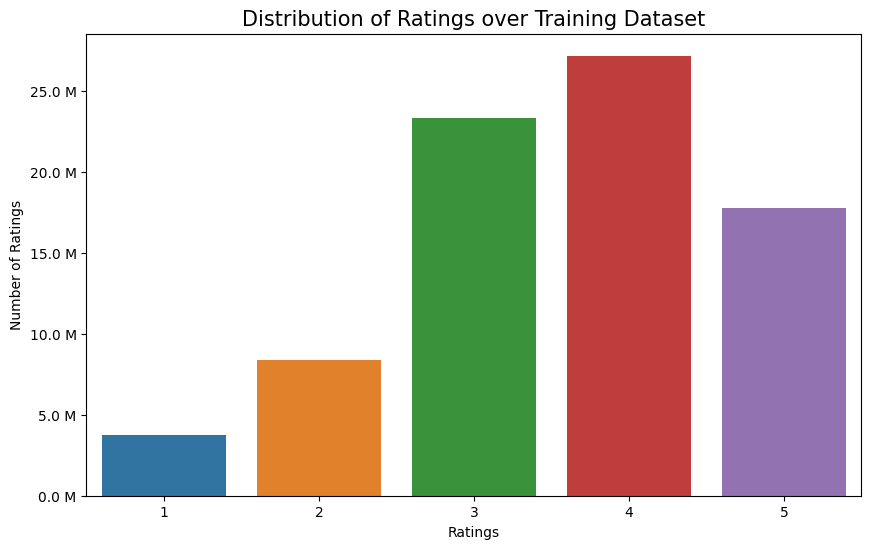

In [ ]:
# Method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"
    
fig, ax = plt.subplots(figsize = (10, 6))
plt.title('Distribution of Ratings over Training Dataset', fontsize=15)
sns.countplot(x = train_df.rating)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.savefig('images/train_distribution.png')
plt.show()

**Inference**: Most of the people tend to give a higher rating i.e 3 or 4 to the movies.

## Weekly Ratings Report
To answer the question whether the day is considered as an important feature

In [44]:
day_names = train_df.date.dt.day_name()
ratings = train_df['rating']

# Need to clear the RAM in order to run the next few code cells
del train_df
del test_df
gc.collect()

23549

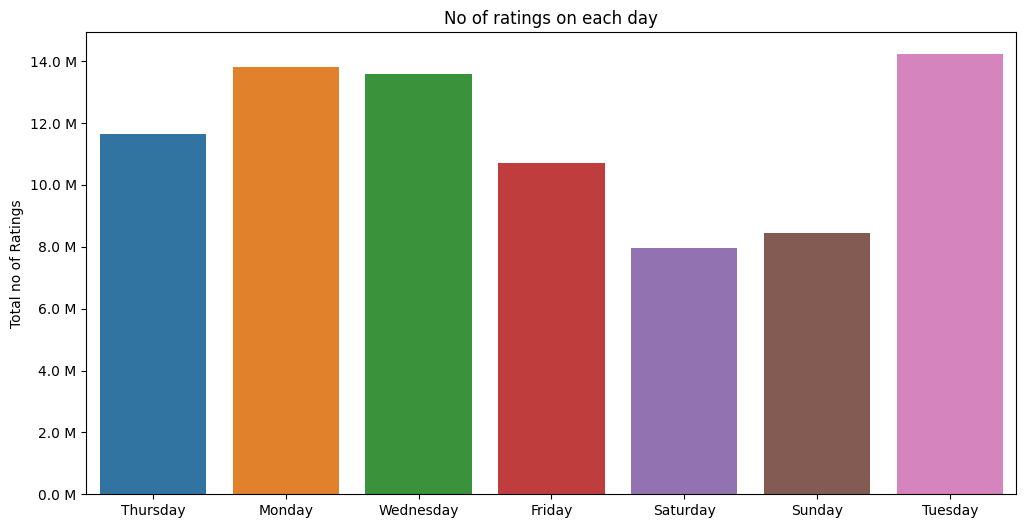

In [45]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x=day_names, ax=ax)
plt.title('No of ratings on each day')
plt.ylabel('Total no of Ratings')
plt.xlabel('')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.savefig('images/week_rating_distribution.png')
plt.show()

**Inference**: People rate movies lesser during the weekends and relatively more during the week days 

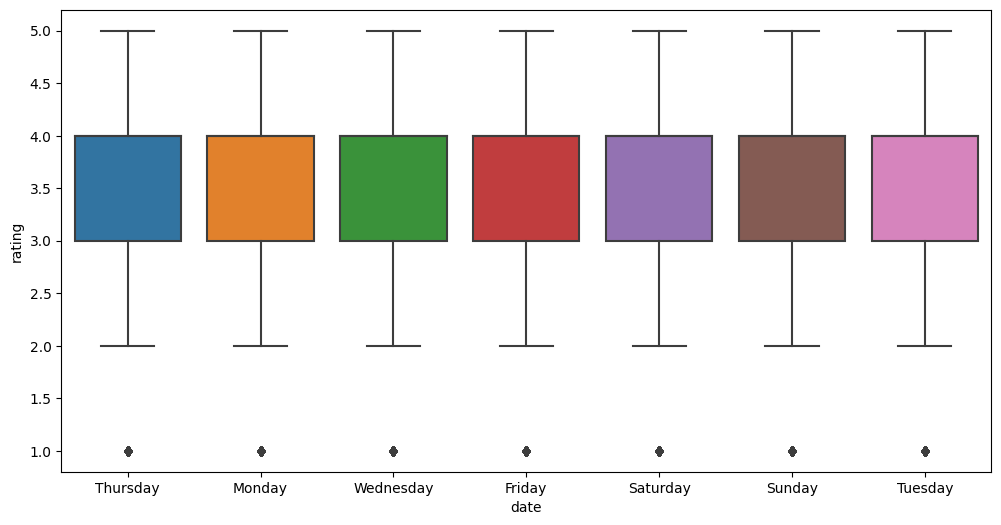

In [46]:
fig = plt.figure(figsize = (12, 6))
sns.boxplot(y=ratings, x=day_names)
plt.show()

**Inference**: Since the Box plots of every day is highly overlapping and the average ratings of the data oevery day are similar, they don't seem to be a good feature.

In [47]:
data = {
    'day_of_week': day_names,
    'rating': ratings
}

del day_names
del ratings
gc.collect()

temp_df = pd.DataFrame(data)
del data

In [48]:
avg_week_df = temp_df.groupby(by=['day_of_week'])['rating'].mean()
print("Average Ratings")
print("-"*30)
print(avg_week_df)
print("\n")

Average Ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




In [49]:
# Removing the list from the RAM
del temp_df
gc.collect()

# Reloading the test and train dataframes in the RAM
train_df = pd.read_csv("../../dataset/train.csv", parse_dates = ['date'])
test_df = pd.read_csv("../../dataset/test.csv")

## Distribution of rating over Time

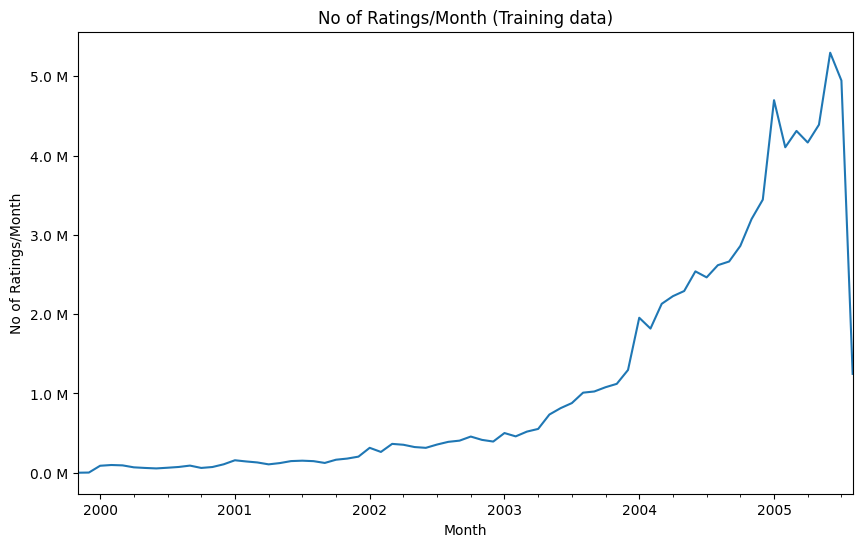

In [52]:
plt.figure(figsize = (10, 6))
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of Ratings/Month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of Ratings/Month')
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([human(item, 'M') for item in ticks_loc])
plt.savefig('images/time_distribution.png')
plt.show()

**Inference**: As shown in the chart above, the data grow exponentially with time. Moreover, as the test set is the ending 20% of the data, it would reflect data over a very short period of time.

In [51]:
no_of_rated_movies_per_user = train_df.groupby(by = 'user')['rating'].count().sort_values(ascending=False)
no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64